In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from astropy.time import Time
# print(os.path.exists(fold_name))


In [2]:
day_now = Time.now().mjd

In [3]:
def read_phot_files(file_):
    data1 = open(file_,'r')
    line1,line2,line3 = np.asarray(data1.readlines()[:3])#.split(' ')[:-1])
    # print(line1)#,line2)
    line1 = line1.split(' ')[:-1] #data
    # line2 telescope
    # line 3 PSF shift in arcsec x y

    line3 = [float(l) for l in line3.split(' ')[2].split(',')]
    # print(line3)
    if 'Liverpool' in line2:line1.append('LT')
    else:line1.append(line2.split(' ')[-1][:-1])

    line1.append(line3[0])
    line1.append(line3[1])

    return line1

def gen_df(fold_name,even_name):
    ind = [0,1,2,3,4,12,5,8,13,14]
    df = pd.DataFrame(columns=['name','filter','mjd','mag','mag_err','telescope','mag_lim','expt','psf_x_shift','psf_y_shift'])
    c=0

    not_stacked = []
    for file_ in glob.glob(fold_name+'/*photometry.txt'):
        line1 = read_phot_files(file_)
        df.loc[c] = [line1[i] for i in ind]
        c+=1

    df['name'] =[name.replace('-ugriz','') for name in df['name']]
    df['mjd'] = df['mjd'].astype(float)
    df['mag'] = df['mag'].astype(float)
    df['mag_err'] = df['mag_err'].astype(float)
    df['telescope'] = df['telescope'].astype(str)
    df['filter'] = df['filter'].astype(str)
    df['mag_lim'] = df['mag_lim'].astype(float)
    df['expt'] = df['expt'].astype(float)

    df = df[df['name']==even_name]
    return df

def plot_lc(name,df,tel='SEDM-P60'):
  filt_cols = {'sdssg':'g','sdssr':'r','sdssi':'orange','sdssz':'brown','sdssu':'blue'}
  fig=plt.figure(figsize=(10,6))
  unique_filts = np.unique(df['filter'])

  for filt in unique_filts:
      if tel=='SEDM-P60':
        df_p60_ = df.loc[(df['filter']==filt)&(df['telescope']=='SEDM-P60')&(df['mag']<30)]
        plt.errorbar(df_p60_['mjd'],df_p60_['mag'],yerr=df_p60_['mag_err'],fmt='o',label='RCCAM/P60 - KPIPE '+filt,alpha=0.5,color=filt_cols[filt])
        df_p60_ul = df.loc[(df['mag']>30)&(df['filter']==filt)]
        plt.scatter(df_p60_ul['mjd'],df_p60_ul['mag_lim'],marker='v',color=filt_cols[filt],alpha=0.5)
      else:
        df_lt_ = df.loc[(df['filter']==filt)&(df['telescope']=='LT')&(df['mag']<30)]
        plt.errorbar(df_lt_['mjd'],df_lt_['mag'],yerr=df_lt_['mag_err'],fmt='o',label='IOO/LT - KPIPE '+filt,alpha=0.5,color=filt_cols[filt])
        df_lt_ul = df.loc[(df['mag']>30)&(df['filter']==filt)]
        plt.scatter(df_lt_ul['mjd'],df_lt_ul['mag_lim'],marker='v',color=filt_cols[filt],alpha=0.5)


  plt.gca().invert_yaxis()
  plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),ncols=1)
  plt.ylabel('Mag')
  plt.xlabel('Days ago'+' ('+str(day_now)+')')
  plt.title(name)

  # plt.xlim(60480,60490)
  # plt.ylim(17,18.5)

  # df['mjd'].loc[(df['mjd']<=60221.16)&(df['mjd']>=60221.1)]
  # plt.axvline(60221.144359)

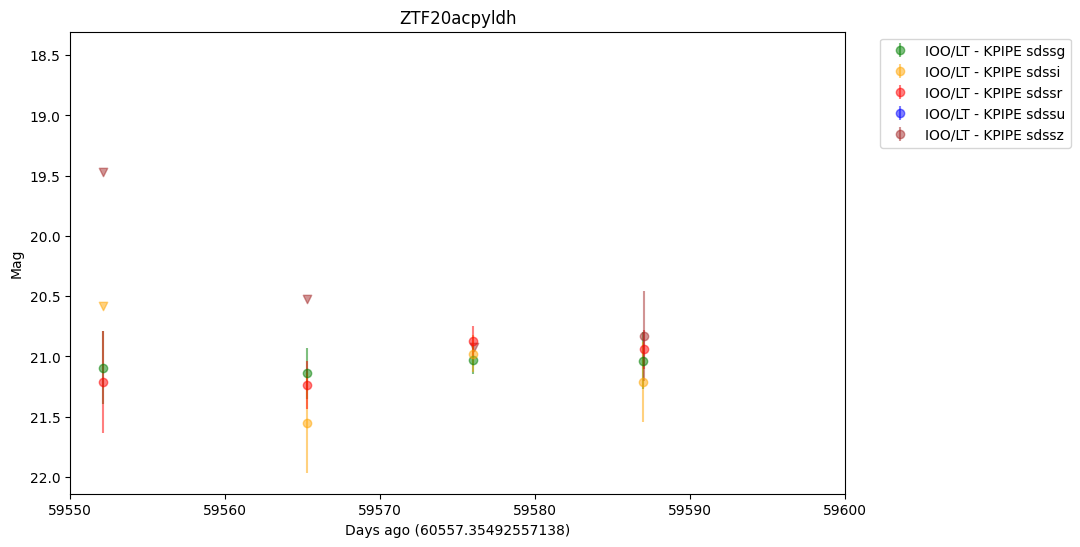

In [11]:
fold_name='/mnt/data1/users/arikhind/phot_data/new_ZTF20acpyldh'
even_name='ZTF20acpyldh'
df = gen_df(fold_name,even_name).sort_values(by='mjd')
plot_lc(even_name,df,tel='LT')
plt.xlim(59550,59600)
df[['mjd','filter','mag','mag_err','mag_lim','expt']].to_csv('/mnt/data1/users/arikhind/phot_data/Final_LC_Data/ZTF20acpyldh.csv',index=False)

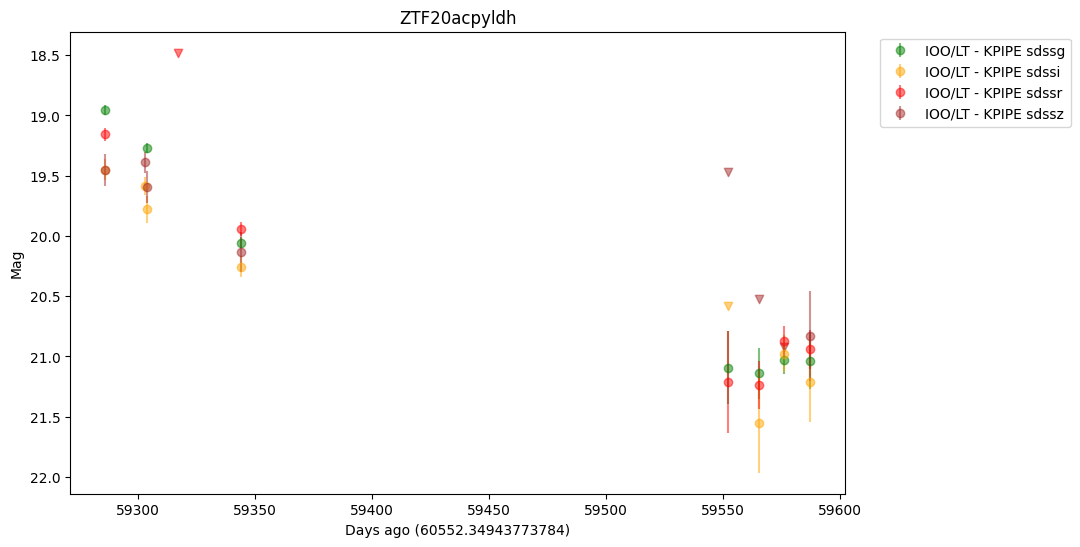

In [12]:
fold_name='/mnt/data1/users/arikhind/phot_data/new_ZTF20acpyldh'
even_name='ZTF20acpyldh'
df = gen_df(fold_name,even_name)
plot_lc(even_name,df,tel='LT')

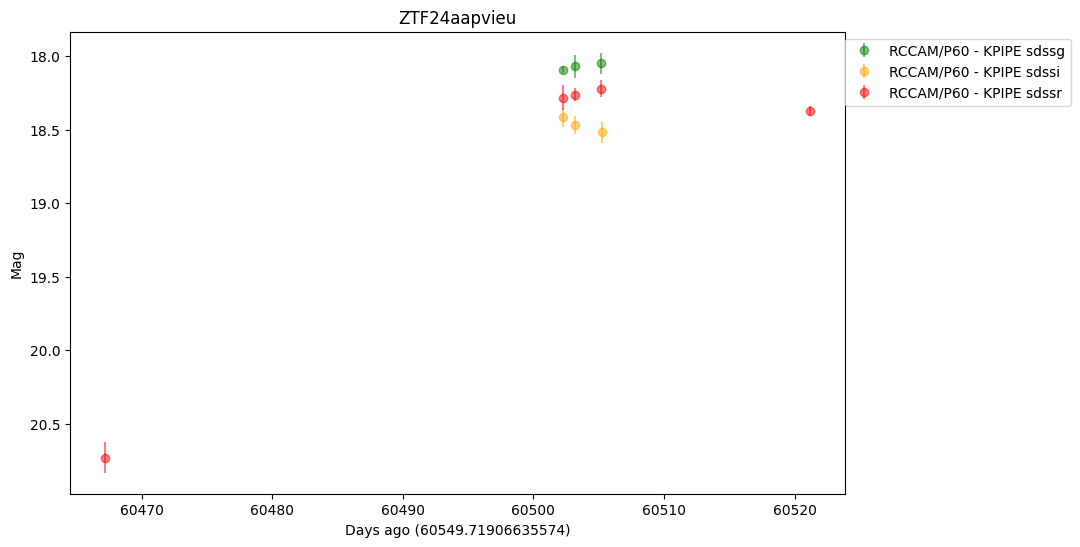

In [17]:
fold_name='/mnt/data1/users/arikhind/phot_data/new_ZTF24aapvieu'
even_name='ZTF24aapvieu'
ztf24aapvieu_df = gen_df(fold_name,even_name)
plot_lc(even_name,ztf24aapvieu_df)

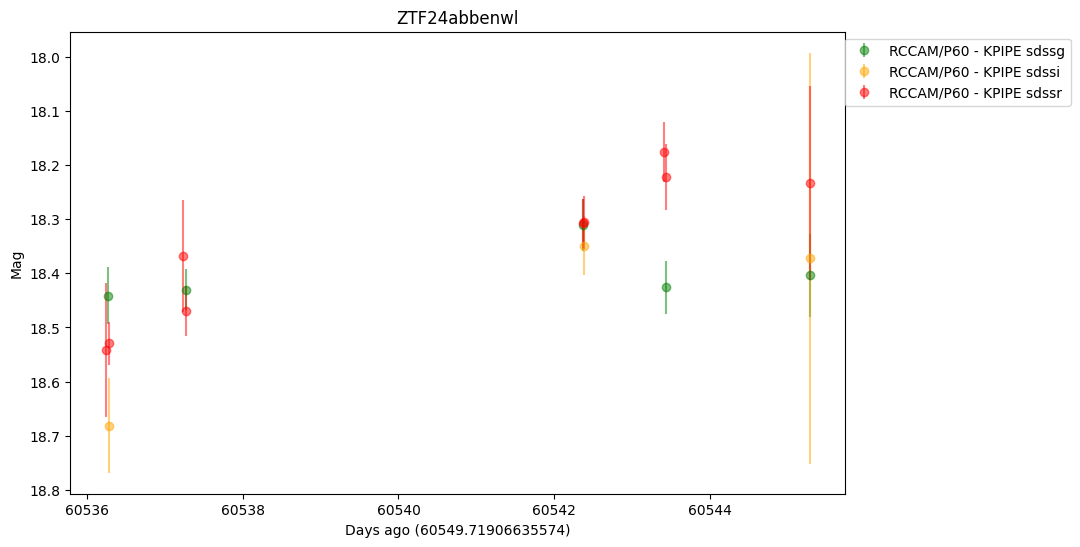

In [18]:
fold_name='/mnt/data1/users/arikhind/phot_data/new_ZTF24abbenwl'
even_name='ZTF24abbenwl'
ztf24abbenwl_df = gen_df(fold_name,even_name)
plot_lc(even_name,ztf24abbenwl_df)

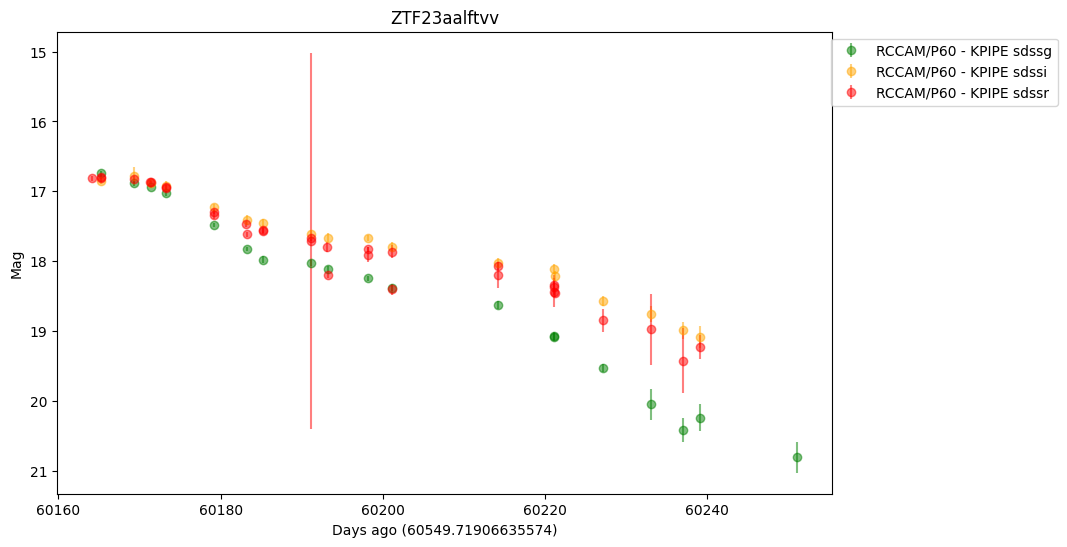

In [20]:
fold_name='/mnt/data1/users/arikhind/phot_data/new_ZTF23aalftvv'
even_name='ZTF23aalftvv'
df = gen_df(fold_name,even_name)
plot_lc(even_name,df)